In [1]:
from pylab import *

In [14]:
# Model for proton
def Phi_proton(E):
    K = 0.0447834 
    E0 = 0.1
    alpha1 = 2.805; alpha2 = 2.56; alpha3 = 2.805; alpha4 = 0.647; alpha5 = 4.363
    omega1 = 0.28; omega2 = 0.163; omega3 = 0.976; omega4 = 1.449
    Eb1 = 0.670; Eb2 = 16; Eb3 = 0.687; Eb4 = 3.874
    delta1 = alpha2 - alpha1
    delta2 = alpha3 - alpha2
    delta3 = alpha4 - alpha3
    delta4 = alpha5 - alpha4
    phi = K * ((E/1e3) / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)
    return phi

# Model for He
def Phi_He(E):
    K = 0.0332401 
    E0 = 0.1
    alpha1 = 2.715; alpha2 = 2.474; alpha3 = 2.734; alpha4 = 2.04; alpha5 = 4.477
    omega1 = 0.28; omega2 = 0.011; omega3 = 0.1; omega4 = 0.934
    Eb1 = 1.204; Eb2 = 32.021; Eb3 = 0.61; Eb4 = 6.262
    delta1 = alpha2 - alpha1
    delta2 = alpha3 - alpha2
    delta3 = alpha4 - alpha3
    delta4 = alpha5 - alpha4
    phi = K * ((E/1e3) / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)
    return phi

logE = np.arange(2,9,0.1)
E = 10**logE
phi_proton = Phi_proton(E)
phi_He = Phi_He(E)
phi_total = phi_proton + phi_He

/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_21332/941924790.py:26: RuntimeWarning: overflow encountered in power
  phi = K * ((E/1e3) / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)


## Auger data from Abreu et al., EPJC 81, 966 (2021)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<Etot>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per R bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err (-) $\quad$ [5] Stat Err (+) $\quad$ [6] Syst Err (-) $\quad$ [7] Syst Err (+)

In [15]:
data_AUGER = np.genfromtxt("Fitting/Data/AllParticle/AUGER_all_data.txt")
E_AUGER = data_AUGER[:,1]
flux_AUGER = data_AUGER[:,3]
error_AUGER_stat_low = data_AUGER[:,4]; error_AUGER_syst_low = data_AUGER[:,6]
error_AUGER_stat_up = data_AUGER[:,5]; error_AUGER_syst_up = data_AUGER[:,7]
error_AUGER_low = np.sqrt(error_AUGER_stat_low**2 + error_AUGER_syst_low**2)
error_AUGER_up = np.sqrt(error_AUGER_stat_up**2 + error_AUGER_syst_up**2)

## IceTop data from Aartsen et al., PhRvD 100, 082002 (2019)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<Etot>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per R bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err ($\pm$) $\quad$ [5] Syst Err (-) $\quad$ [6] Syst Err (+)

In [16]:
data_ICETOP = np.genfromtxt("Fitting/Data/AllParticle/IceTop_all_data.txt")
E_ICETOP = data_ICETOP[:,1]
flux_ICETOP = data_ICETOP[:,3]
error_ICETOP_stat = data_ICETOP[:,4]; error_ICETOP_syst_low = data_ICETOP[:,5]; error_ICETOP_syst_up = data_ICETOP[:,6]
error_ICETOP_low = np.sqrt(error_ICETOP_stat**2 + error_ICETOP_syst_low**2)
error_ICETOP_up = np.sqrt(error_ICETOP_stat**2 + error_ICETOP_syst_up**2)

## TUNKA data from Prosin et al., NIMPA 756, 94 (2014)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<Etot>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per R bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err ($\pm$) $\quad$ [5] Syst Err ($\pm$)

In [17]:
data_TUNKA = np.genfromtxt("Fitting/Data/AllParticle/TUNKA_all_data.txt")
E_TUNKA = data_TUNKA[:,1]
flux_TUNKA = data_TUNKA[:,3]
error_TUNKA_stat = data_TUNKA[:,4]; error_TUNKA_syst = data_TUNKA[:,5]
error_TUNKA = np.sqrt(error_TUNKA_stat**2 + error_TUNKA_syst**2)

## HAWC data from Morales-Soto et al., ICRC 37, 330 (2022)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<Etot>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per R bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err (-) $\quad$ [5] Stat Err (+) $\quad$ [6] Syst Err (-) $\quad$ [7] Syst Err (+)

In [18]:
data_HAWC = np.genfromtxt("Fitting/Data/AllParticle/HAWC_all_data.txt")
E_HAWC= data_HAWC[:,1]
flux_HAWC = data_HAWC[:,3]
error_HAWC_stat_low = data_HAWC[:,4]; error_HAWC_syst_low = data_HAWC[:,6]
error_HAWC_stat_up = data_HAWC[:,5]; error_HAWC_syst_up = data_HAWC[:,7]
error_HAWC_low = np.sqrt(error_HAWC_stat_low**2 + error_HAWC_syst_low**2)
error_HAWC_up = np.sqrt(error_HAWC_stat_up**2 + error_HAWC_syst_up**2)

## KASCADE data from Antoni et al., APh 24, 1 (2005)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<Etot>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per R bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err ($\pm$) $\quad$ [5] Syst Err ($\pm$)

In [19]:
data_KASCADE = np.genfromtxt("Fitting/Data/AllParticle/KASCADE_all_data_QGSJet01.txt")
E_KASCADE = data_KASCADE[:,1]
flux_KASCADE = data_KASCADE[:,3]
error_KASCADE_stat = data_KASCADE[:,4]; error_KASCADE_syst = data_KASCADE[:,5]
error_KASCADE = np.sqrt(error_KASCADE_stat**2 + error_KASCADE_syst**2)

## NUCLEON data from Advances Space Research, 64 (12), 2019
### Data sets columns:
#### [0] $<Etot>$ (GeV) $\quad$ [1] Flux (per R bin)  (GeV m2 s sr)-1 $\quad$ [2] Stat Err (-) $\quad$ [3] Stat Err (+) $\quad$ [4] Syst Err (-) $\quad$ [5] Syst Err (+)

In [20]:
data_NUCLEON = np.genfromtxt("Fitting/Data/AllParticle/NUCLEON_all_data_new.txt")
#E_NUCLEON = data_NUCLEON[:,1]
#flux_NUCLEON = data_NUCLEON[:,3]
#error_NUCLEON = data_NUCLEON[:,4]

E_NUCLEON = data_NUCLEON[:,0] / 1e9
flux_NUCLEON = data_NUCLEON[:,1] * 1e9
error_NUCLEON_stat_low = data_NUCLEON[:,2]; error_NUCLEON_stat_up = data_NUCLEON[:,3]
error_NUCLEON_syst_low = data_NUCLEON[:,4]; error_NUCLEON_syst_up = data_NUCLEON[:,5]
error_NUCLEON_low = np.sqrt(error_NUCLEON_stat_low**2 + error_NUCLEON_syst_low**2)
error_NUCLEON_up = np.sqrt(error_NUCLEON_stat_up**2 + error_NUCLEON_syst_up**2)

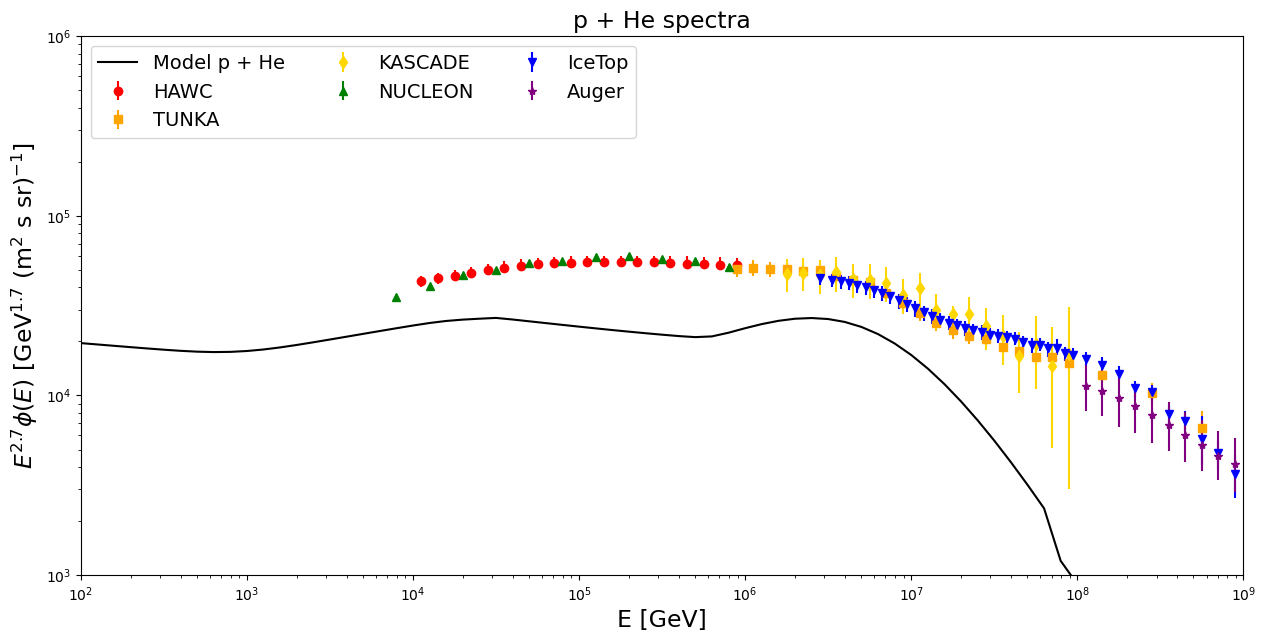

In [21]:
plt.figure(figsize=(15, 7))
# Models
plt.plot(E, phi_total * E**2.7, color='black', label=r'Model p + He')
# Data
plt.errorbar(E_HAWC, flux_HAWC * E_HAWC**2.7, yerr=(error_HAWC_low, error_HAWC_up) * E_HAWC**2.7, fmt='o', color='red', label='HAWC')
plt.errorbar(E_TUNKA, flux_TUNKA * E_TUNKA**2.7, yerr=error_TUNKA * E_TUNKA**2.7, fmt='s', color='orange', label='TUNKA')
plt.errorbar(E_KASCADE, flux_KASCADE * E_KASCADE**2.7, yerr=error_KASCADE * E_KASCADE**2.7, fmt='d', color='gold', label='KASCADE')
plt.errorbar(E_NUCLEON, flux_NUCLEON * E_NUCLEON**2.7, yerr=(error_NUCLEON_low, error_NUCLEON_up) * E_NUCLEON**2.7, fmt='^', color='green', label='NUCLEON')
plt.errorbar(E_ICETOP, flux_ICETOP * E_ICETOP**2.7, yerr=(error_ICETOP_low, error_ICETOP_up) * E_ICETOP**2.7, fmt='v', color='blue', label='IceTop')
plt.errorbar(E_AUGER, flux_AUGER * E_AUGER**2.7, yerr=(error_AUGER_low, error_AUGER_up) * E_AUGER**2.7, fmt='*', color='purple', label='Auger')
plt.loglog()
plt.xlim(1e2, 1e9)
plt.ylim(1e3, 1e6)
plt.xlabel('E [GeV]', fontsize=17)
plt.ylabel(r'$E^{2.7}\phi(E)$ [GeV$^{1.7}$ (m$^2$ s sr)$^{-1}$]', fontsize=17)
plt.legend(ncol=3, fontsize=14, loc='upper left')
plt.title('p + He spectra', fontsize=17)
plt.savefig('Plots/comparison_p_He_model_allparticle.png')

/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_21332/941924790.py:26: RuntimeWarning: overflow encountered in power
  phi = K * ((E/1e3) / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


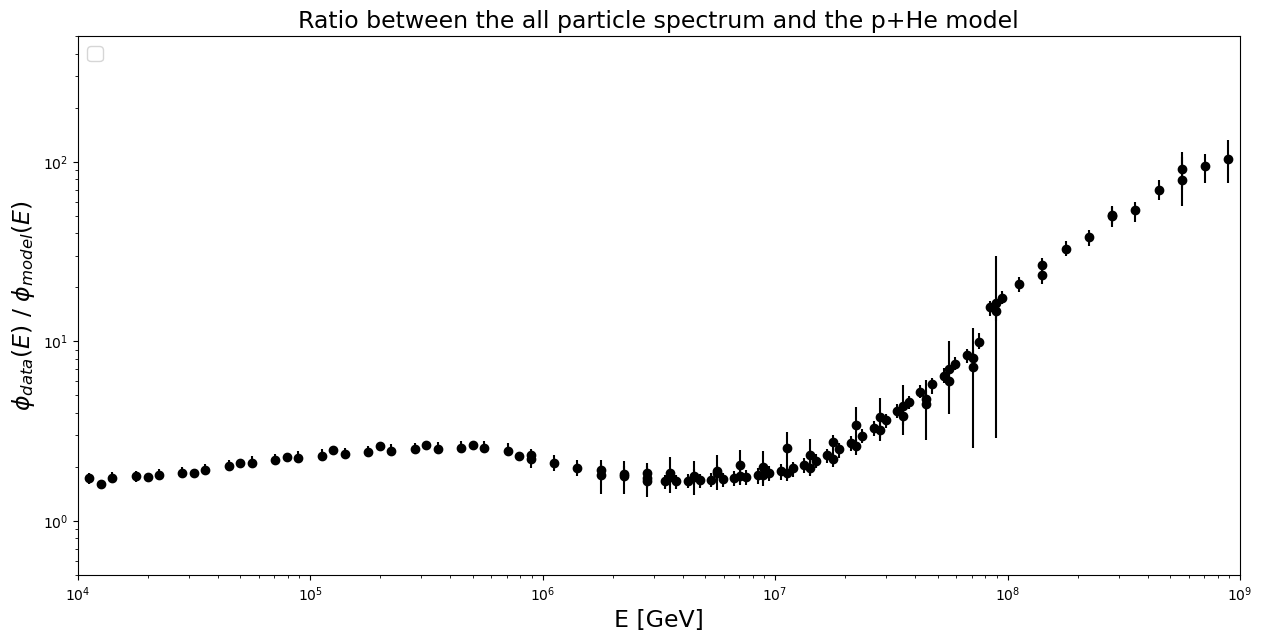

In [10]:
E = np.append(np.append(np.append(np.append(E_HAWC, E_TUNKA), E_KASCADE), E_ICETOP), E_NUCLEON)
Flux = np.append(np.append(np.append(np.append(flux_HAWC, flux_TUNKA), flux_KASCADE), flux_ICETOP), flux_NUCLEON)
Sigma_low = np.append(np.append(np.append(np.append(error_HAWC_low, error_TUNKA), error_KASCADE), error_ICETOP_low), error_NUCLEON_low)
Sigma_up = np.append(np.append(np.append(np.append(error_HAWC_up, error_TUNKA), error_KASCADE), error_ICETOP_up), error_NUCLEON_up)


phi_proton = Phi_proton(E)
phi_He = Phi_He(E)
phi_total = phi_proton + phi_He

ratio = Flux / phi_total
error_low = ratio * (Sigma_low / Flux)
error_up = ratio * (Sigma_up / Flux)

plt.figure(figsize=(15, 7))
# Models
plt.errorbar(E, ratio, yerr=(error_low, error_up), fmt='o', color='black')
plt.loglog()
plt.xlim(1e4, 1e9)
plt.ylim(5e-1, 5e2)
plt.xlabel('E [GeV]', fontsize=17)
plt.ylabel(r'$\phi_{data}(E)$ / $\phi_{model}(E)$', fontsize=17)
plt.legend(ncol=3, fontsize=14, loc='upper left')
plt.title('Ratio between the all particle spectrum and the p+He model', fontsize=17)
plt.savefig('Plots/ratio_model_allparticle.png')

## Estimation of total spectrum for energy per nucleon

In [11]:
# Model for proton
def Phi_proton_nucleon(E):
    n = 1
    K = 0.0447834 * n
    E0 = 0.1 / n
    alpha1 = 2.805; alpha2 = 2.56; alpha3 = 2.805; alpha4 = 0.647; alpha5 = 4.363
    omega1 = 0.28; omega2 = 0.163; omega3 = 0.976; omega4 = 1.449
    Eb1 = 0.670 / n; Eb2 = 16 / n; Eb3 = 0.687 / n; Eb4 = 3.874 / n
    delta1 = alpha2 - alpha1
    delta2 = alpha3 - alpha2
    delta3 = alpha4 - alpha3
    delta4 = alpha5 - alpha4
    phi = K * ((E/1e3) / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)
    return phi

# Model for He
def Phi_He_nucleon(E):
    n = 4
    K = 0.0332401 * n
    E0 = 0.1 / n
    alpha1 = 2.715; alpha2 = 2.474; alpha3 = 2.734; alpha4 = 2.04; alpha5 = 4.477
    omega1 = 0.28; omega2 = 0.011; omega3 = 0.1; omega4 = 0.934
    Eb1 = 1.204 / n; Eb2 = 32.021 / n; Eb3 = 0.61 / n; Eb4 = 6.262 / n
    delta1 = alpha2 - alpha1
    delta2 = alpha3 - alpha2
    delta3 = alpha4 - alpha3
    delta4 = alpha5 - alpha4
    phi = K * ((E/1e3) / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)
    return phi

# Model for He
def Phi_heavy_nucleon(E):
    Phi_He_nucleon(E) * 2
    return phi


logE = np.arange(2,9,0.1)
E = 10**logE
phi_proton_nucleon = Phi_proton_nucleon(E)
phi_He_nucleon = Phi_He_nucleon(E)
phi_heavy_nucleon = Phi_He_nucleon(E)
phi_partial_nucleon = phi_proton_nucleon + phi_He_nucleon
phi_total_nucleon = phi_proton_nucleon + phi_He_nucleon + phi_heavy_nucleon

/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_21332/3079641378.py:28: RuntimeWarning: overflow encountered in power
  phi = K * ((E/1e3) / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)


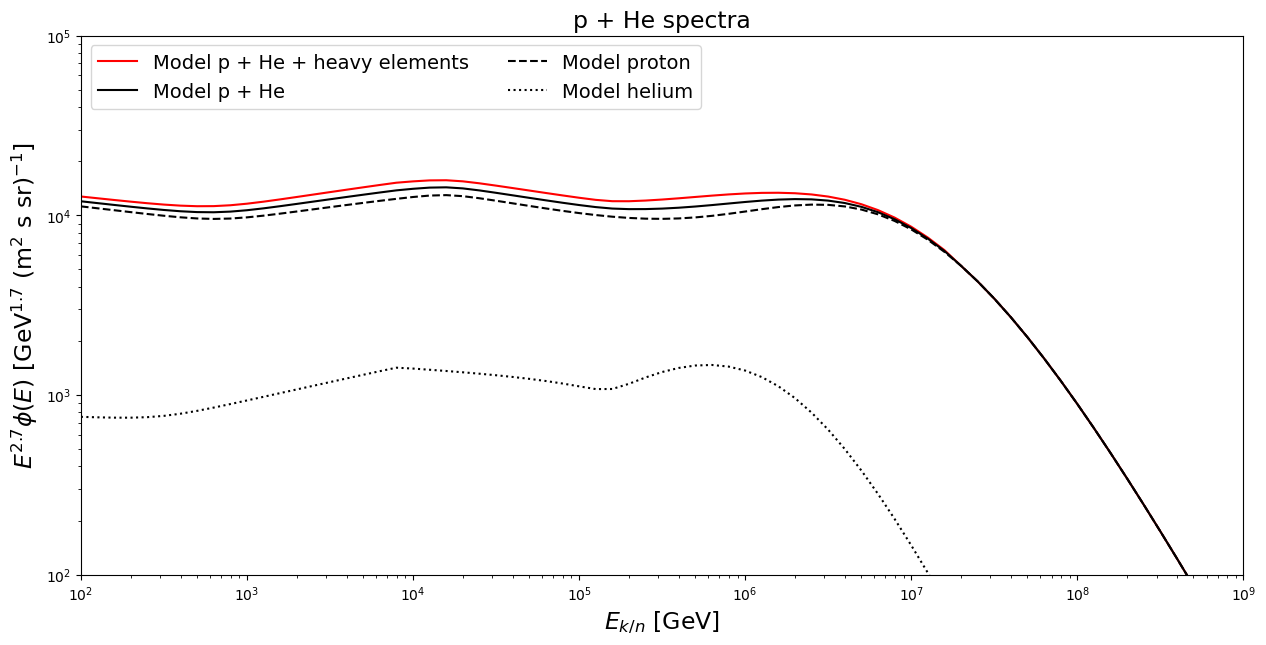

In [12]:
plt.figure(figsize=(15, 7))
# Models
plt.plot(E, phi_total_nucleon * E**2.7, color='red', label=r'Model p + He + heavy elements')
plt.plot(E, phi_partial_nucleon * E**2.7, color='black', label=r'Model p + He')
plt.plot(E, phi_proton_nucleon * E**2.7, '--', color='black', label=r'Model proton')
plt.plot(E, phi_He_nucleon * E**2.7, ':', color='black', label=r'Model helium')
#
plt.loglog()
plt.xlim(1e2, 1e9)
plt.ylim(1e2, 1e5)
plt.xlabel(r'$E_{k/n}$ [GeV]', fontsize=17)
plt.ylabel(r'$E^{2.7}\phi(E)$ [GeV$^{1.7}$ (m$^2$ s sr)$^{-1}$]', fontsize=17)
plt.legend(ncol=2, fontsize=14, loc='upper left')
plt.title('p + He spectra', fontsize=17)
plt.savefig('Plots/estimation_energy_per_nucleon.png')